In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


# DATASET

El presente dataset representa el consumo diario de Gas Natural en una población de Colombia, a los datos originales, se les realizó una transformación. La información esta comprendida entre el 01/01/2024 al 23/05/2024

In [21]:
data = pd.read_excel('./consumo.xlsx')
data['FECHA'] = pd.to_datetime(data['FECHA'], format='%d/%m/%Y')

# Configura la columna 'FECHA' como índice del dataframe
data.set_index('FECHA', inplace=True)
data.head(5)


,CONSUMO,FESTIVO
FECHA,,
2014-01-01,1025.77354,Año_nuevo
2014-01-02,1478.33453,Normal
2014-01-03,1610.05269,Normal
2014-01-04,1578.83430,Normal
2014-01-05,1328.31417,Normal


In [22]:
data.tail(5)

,CONSUMO,FESTIVO
FECHA,,
2024-05-19,1594.514590,Normal
2024-05-20,1925.984277,Normal
2024-05-21,1939.075098,Normal
2024-05-22,1978.057168,Normal
2024-05-23,883.486753,Normal


In [23]:
data.describe()

,CONSUMO
count,3796.000000
mean,1858.089473
std,200.217954
min,883.486753
25%,1762.253628
50%,1922.235456
75%,1996.612690
max,2286.384541


# GRAFICOS

## Tendencia General

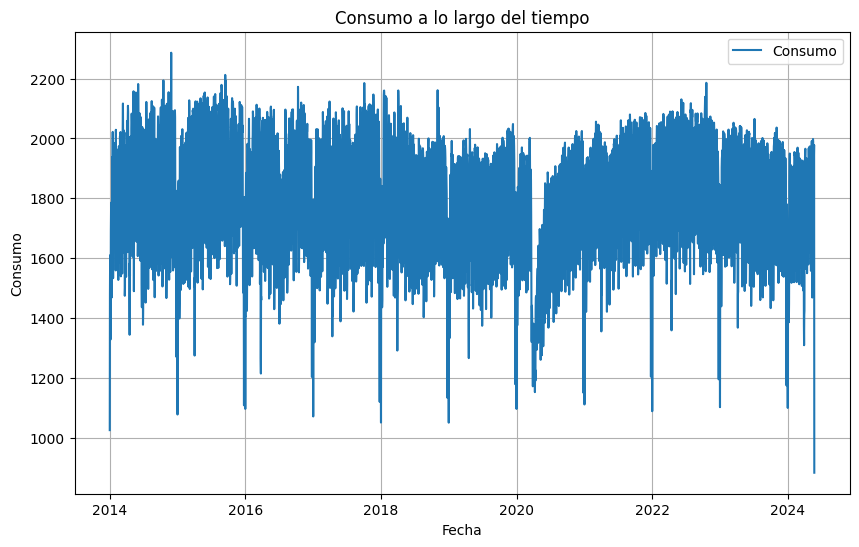

In [4]:
# Crear una gráfica básica de la columna CONSUMO
plt.figure(figsize=(10,6))
plt.plot(data.index, data['CONSUMO'], label='Consumo')
plt.title('Consumo a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.grid(True)
plt.show()


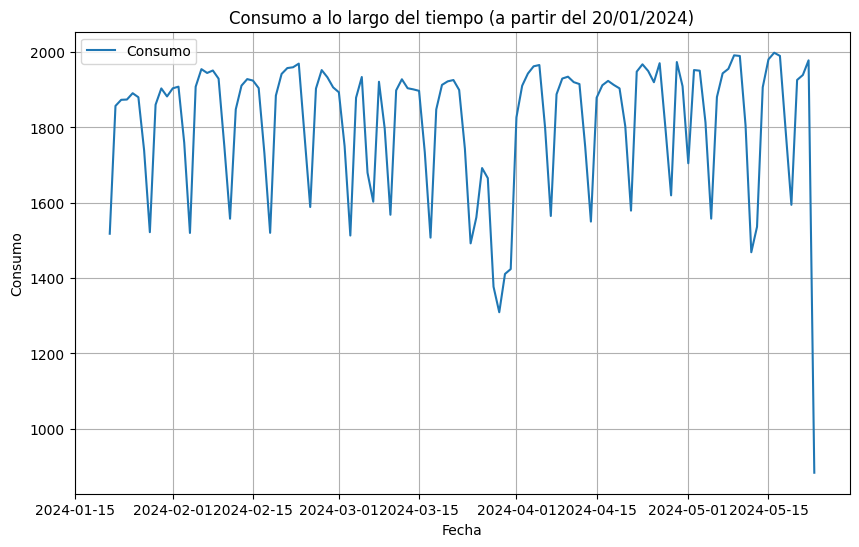

In [27]:
plt.figure(figsize=(10,6))

# Crear el filtro de fecha
fecha_filtro = pd.to_datetime('20/01/2024', format='%d/%m/%Y')

# Filtrar y graficar
plt.plot(data[data.index > fecha_filtro].index, data['CONSUMO'][data.index > fecha_filtro], label='Consumo')

# Configuración de la gráfica
plt.title('Consumo a lo largo del tiempo (a partir del 20/01/2024)')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.grid(True)
plt.show()


## Descomposición de la serie de tiempo

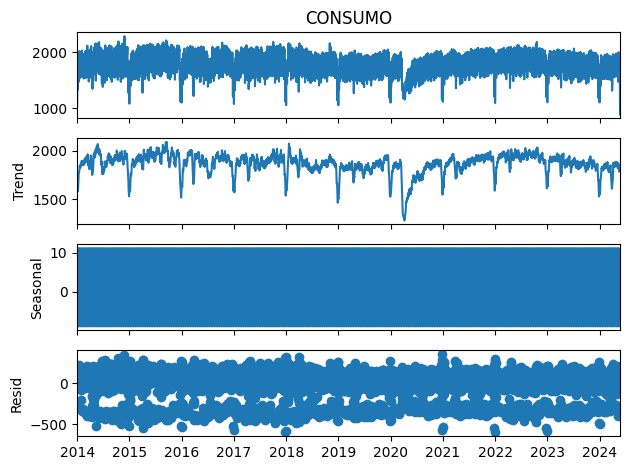

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición aditiva de la serie de tiempo
decomposition = seasonal_decompose(data['CONSUMO'], model='additive', period=12)

# Graficar la descomposición
decomposition.plot()
plt.show()


## Estacionalidad

In [28]:
# Crear una nueva columna con el valor del mes y el año a partir del índice
data['MONTH'] = data.index.month
data['YEAR'] = data.index.year
data['DAY'] = data.index.day
data['DAY_WEEK'] = data.index.day_of_week

In [7]:
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'}
data['QUARTER'] = data['MONTH'].map(lambda m: month_quarter_map.get(m))


In [8]:
trend_model = LinearRegression(fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['CONSUMO'])

LinearRegression()

In [9]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

Trend model coefficient=-0.012763928187789379 and intercept=1882.3090265603428


In [10]:
residuals = np.array(data['CONSUMO']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))
data['Residuals'] = residuals

In [11]:
seasonal_sub_series_data = data.groupby(by=['YEAR', 'QUARTER'])['CONSUMO'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']
seasonal_sub_series_data.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_20712\2604833008.py:1: FutureWarning: The provided callable <function mean at 0x00000218565C8280> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  seasonal_sub_series_data = data.groupby(by=['YEAR', 'QUARTER'])['CONSUMO'].aggregate([np.mean, np.std])
C:\Users\andre\AppData\Local\Temp\ipykernel_20712\2604833008.py:1: FutureWarning: The provided callable <function std at 0x00000218565C83A0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  seasonal_sub_series_data = data.groupby(by=['YEAR', 'QUARTER'])['CONSUMO'].aggregate([np.mean, np.std])


Quarterly Mean  Quarterly Standard Deviation
YEAR QUARTER                                              
2014 Q1          1828.321015                    194.196061
     Q2          1919.964838                    212.961867
     Q3          1886.693791                    171.520284
     Q4          1903.804254                    209.651347
2015 Q1          1856.660585                    207.545305

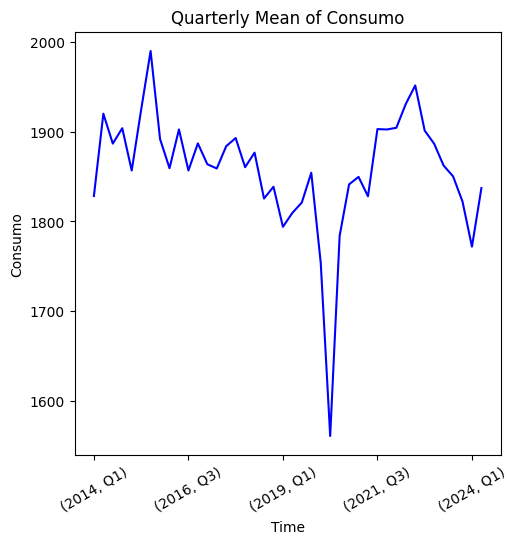

In [12]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Consumo')
plt.xlabel('Time')
plt.ylabel('Consumo')
plt.xticks(rotation=30);

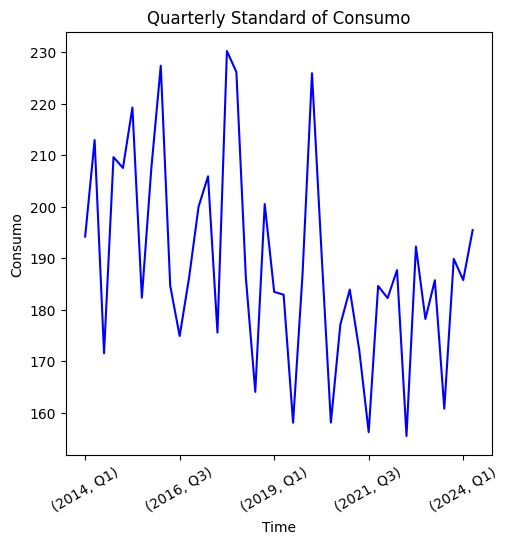

In [24]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Standard of Consumo')
plt.xlabel('Time')
plt.ylabel('Consumo')
plt.xticks(rotation=30);

## Dia de la semana

C:\Users\andre\AppData\Local\Temp\ipykernel_20712\2436403106.py:1: FutureWarning: The provided callable <function mean at 0x00000218565C8280> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  daily_sub_series_data = data.groupby(by=['DAY_WEEK'])['CONSUMO'].aggregate([np.mean, np.std])
C:\Users\andre\AppData\Local\Temp\ipykernel_20712\2436403106.py:1: FutureWarning: The provided callable <function std at 0x00000218565C83A0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  daily_sub_series_data = data.groupby(by=['DAY_WEEK'])['CONSUMO'].aggregate([np.mean, np.std])


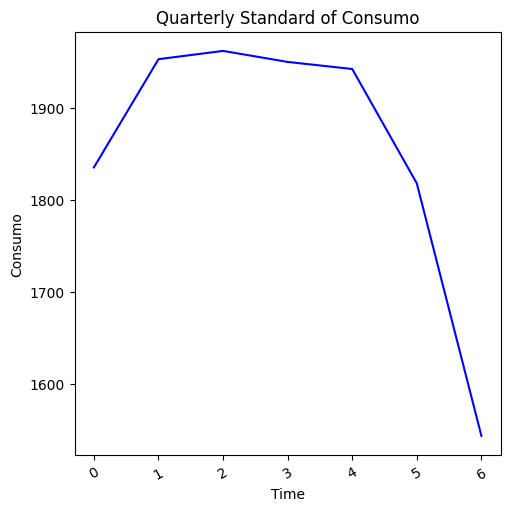

In [32]:
daily_sub_series_data = data.groupby(by=['DAY_WEEK'])['CONSUMO'].aggregate([np.mean, np.std])
daily_sub_series_data.columns = ['Daily_Week_Mean', 'Daily_Week_Std']
plt.figure(figsize=(5.5, 5.5))
daily_sub_series_data['Daily_Week_Mean'].plot(color='b')
plt.title('Quarterly Standard of Consumo')
plt.xlabel('Time')
plt.ylabel('Consumo')
plt.xticks(rotation=30);


## Graficos de cajas multiples

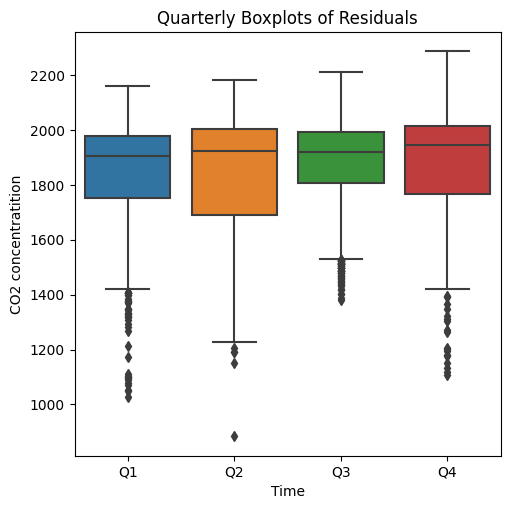

In [14]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data, y='CONSUMO', x='QUARTER')
g.set_title('Quarterly Boxplots Consumo')
g.set_xlabel('Time')
g.set_ylabel('Consumo');

Text(0, 0.5, 'Consumo')

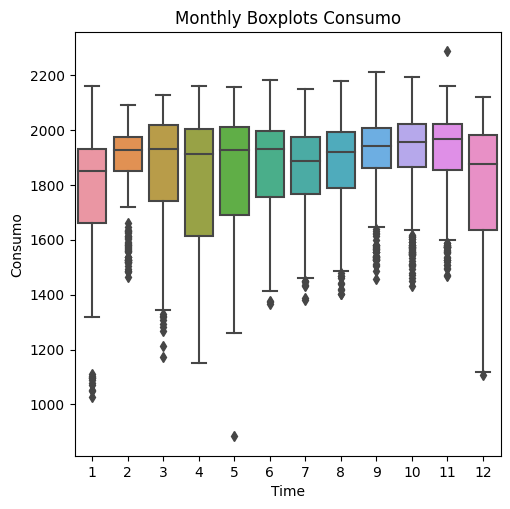

In [18]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data, y='CONSUMO', x='MONTH')
g.set_title('Monthly Boxplots Consumo')
g.set_xlabel('Time')
g.set_ylabel('Consumo')

Text(0, 0.5, 'Consumo')

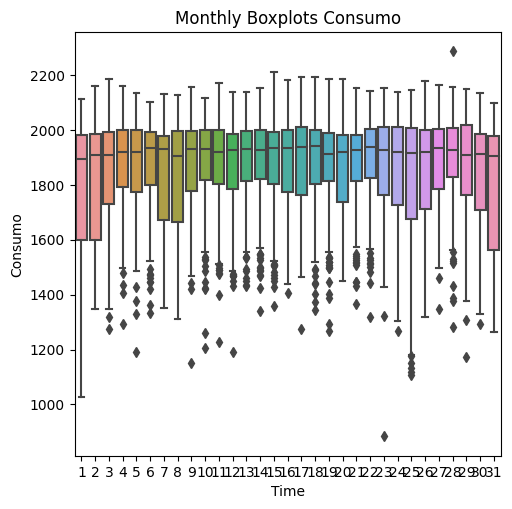

In [19]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data, y='CONSUMO', x='DAY')
g.set_title('Monthly Boxplots Consumo')
g.set_xlabel('Time')
g.set_ylabel('Consumo')

## Media móvil

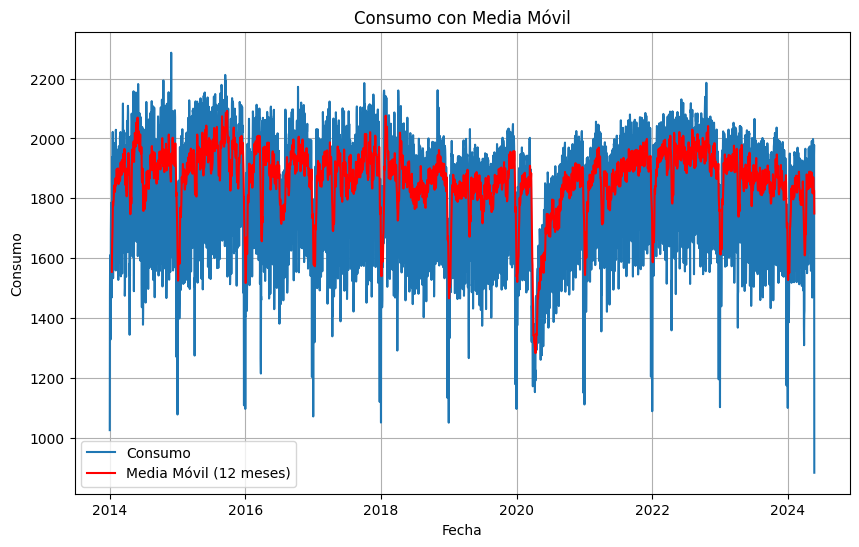

In [15]:
# Calcular la media móvil con una ventana de 12 meses
data['media_movil'] = data['CONSUMO'].rolling(window=12).mean()

# Gráfica de la media móvil
plt.figure(figsize=(10,6))
plt.plot(data.index, data['CONSUMO'], label='Consumo')
plt.plot(data.index, data['media_movil'], label='Media Móvil (12 meses)', color='red')
plt.title('Consumo con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.grid(True)
plt.show()


Se observa que:

- Antes del COVID (2020), la tendencia era disminución de los consumos, durante la pandemia esto se agravó, despues de pandemia la tendencia general era aumentar nuevamente, seguramente por la reactivación de los consumos, sin embargo, se evidencia que nuevamente la tendencia general es a la disminución.

- Se observa que durante los días sabado, domingo y lunes los consumos son significativamente inferiores que los otros días de la semana.

- Revisando las distribuciones, se observa que la mayoría de lo datos atipicos se encuentra en la zona de outlieres del bigote inferior, probablemente, esto es debido a la cantidad de festivos, ferias y fechas especiales del país.

<!-- # Interpretación:

De las gráficas realizadas, podemos indicar que:

- El consumo presenta una tendencia general de disminución, esto se evidencia antes del 2020, antes del COVID, posterior a este fenomeno, hubo un repunte en los consumos, sin embargo, nuevamente a empezado a disminuir.
- Se observa disminución de los consumos ñps días sabados y domingos.
- Al revisar los datos de distribución, se observa que los valores atipicos son a la baja, probablemente es debido a los festivos de colombia. -->